# Space Server Project
## Problem Statement:
Context
This is the Sloan Digital Sky Survey based dataset which offers public data of space observations. The insights gained from this dataset are very useful and can force anyone to think out of the box. 

Content
The data consists of 10,000 observations of space taken by the SDSS. Every observation is described by 17 feature columns and 1 class column which identifies it to be either a star, galaxy or quasar.

Feature Description
The table results from a query which joins two tables (actually views): "PhotoObj" which contains photometric data and "SpecObj" which contains spectral data.

To ease your start with the data you can read the feature descriptions below:

View "PhotoObj"
objid = Object Identifier
ra = J2000 Right Ascension (r-band)
dec = J2000 Declination (r-band)
Right ascension (abbreviated RA) is the angular distance measured eastward along the celestial equator from the Sun at the March equinox to the hour circle of the point above the earth in question. When paired with declination (abbreviated dec), these astronomical coordinates specify the direction of a point on the celestial sphere (traditionally called in English the skies or the sky) in the equatorial coordinate system.

Source: https://en.wikipedia.org/wiki/Right_ascension

u = better of DeV/Exp magnitude fit
g = better of DeV/Exp magnitude fit
r = better of DeV/Exp magnitude fit
i = better of DeV/Exp magnitude fit
z = better of DeV/Exp magnitude fit
The Thuan-Gunn astronomic magnitude system. u, g, r, i, z represent the response of the 5 bands of the telescope.

Further education: https://www.astro.umd.edu/~ssm/ASTR620/mags.html

run = Run Number
rereun = Rerun Number
camcol = Camera column
field = Field number
Run, rerun, camcol and field are features which describe a field within an image taken by the SDSS. A field is basically a part of the entire image corresponding to 2048 by 1489 pixels. A field can be identified by:

run number, which identifies the specific scan,
the camera column, or "camcol," a number from 1 to 6, identifying the scanline within the run, and
the field number. The field number typically starts at 11 (after an initial rampup time), and can be as large as 800 for particularly long runs.
An additional number, rerun, specifies how the image was processed.
View "SpecObj"
specobjid = Object Identifier
class = object class (galaxy, star or quasar object)
The class identifies an object to be either a galaxy, star or quasar. This will be the response variable which you will be trying to predict.

redshift = Final Redshift
plate = plate number
mjd = MJD of observation
fiberid = fiber ID
In physics, redshift happens when light or other electromagnetic radiation from an object is increased in wavelength, or shifted to the red end of the spectrum.

Each spectroscopic exposure employs a large, thin, circular metal plate that positions optical fibers via holes drilled at the locations of the images in the telescope focal plane. These fibers then feed into the spectrographs. Each plate has a unique serial number, which is called plate in views such as SpecObj in the CAS.

Modified Julian Date, used to indicate the date that a given piece of SDSS data (image or spectrum) was taken.

The SDSS spectrograph uses optical fibers to direct the light at the focal plane from individual objects to the slithead. Each object is assigned a corresponding fiberID.

Further information on SDSS images and their attributes:

http://www.sdss3.org/dr9/imaging/imaging_basics.php

http://www.sdss3.org/dr8/glossary.php

Inspiration
The dataset offers plenty of information about space to explore. Also the class column is the perfect target for classification practices!



# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# loading the dataset

In [2]:
df=pd.read_csv('space_server.csv')
df.head()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,1.237650e+18,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,301,4,267,3.722360e+18,STAR,-0.000009,3306,54922,491
1,1.237650e+18,183.598370,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,301,4,267,3.638140e+17,STAR,-0.000055,323,51615,541
2,1.237650e+18,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,301,4,268,3.232740e+17,GALAXY,0.123111,287,52023,513
3,1.237650e+18,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,301,4,269,3.722370e+18,STAR,-0.000111,3306,54922,510
4,1.237650e+18,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,301,4,269,3.722370e+18,STAR,0.000590,3306,54922,512


Top 5 heads of the dataset.

In [3]:
df.tail()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
9995,1.237650e+18,131.316413,51.539547,18.81777,17.47053,16.91508,16.68305,16.50570,1345,301,3,161,5.033450e+17,GALAXY,0.027583,447,51877,246
9996,1.237650e+18,131.306083,51.671341,18.27255,17.43849,17.07692,16.71661,16.69897,1345,301,3,162,5.033400e+17,GALAXY,0.117772,447,51877,228
9997,1.237650e+18,131.552562,51.666986,18.75818,17.77784,17.51872,17.43302,17.42048,1345,301,3,162,8.222620e+18,STAR,-0.000402,7303,57013,622
9998,1.237650e+18,131.477151,51.753068,18.88287,17.91068,17.53152,17.36284,17.13988,1345,301,3,163,5.033400e+17,GALAXY,0.014019,447,51877,229
9999,1.237650e+18,131.665012,51.805307,19.27586,17.37829,16.30542,15.83548,15.50588,1345,301,3,163,5.033410e+17,GALAXY,0.118417,447,51877,233


Bottom 5 of the dataset.

# EDA

In [4]:
# checking shape
df.shape

(10000, 18)

10000 rows and 18 columns in the dataset.

In [9]:
# checking data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   objid      10000 non-null  float64
 1   ra         10000 non-null  float64
 2   dec        10000 non-null  float64
 3   u          10000 non-null  float64
 4   g          10000 non-null  float64
 5   r          10000 non-null  float64
 6   i          10000 non-null  float64
 7   z          10000 non-null  float64
 8   run        10000 non-null  int64  
 9   rerun      10000 non-null  int64  
 10  camcol     10000 non-null  int64  
 11  field      10000 non-null  int64  
 12  specobjid  10000 non-null  float64
 13  class      10000 non-null  object 
 14  redshift   10000 non-null  float64
 15  plate      10000 non-null  int64  
 16  mjd        10000 non-null  int64  
 17  fiberid    10000 non-null  int64  
dtypes: float64(10), int64(7), object(1)
memory usage: 1.4+ MB


10 float data type column, 7 integer data type columns and 1 object data type column present in the dataset.

In [10]:
# Checking NUll values
df.isnull().sum()

objid        0
ra           0
dec          0
u            0
g            0
r            0
i            0
z            0
run          0
rerun        0
camcol       0
field        0
specobjid    0
class        0
redshift     0
plate        0
mjd          0
fiberid      0
dtype: int64

No null values in the dataset.

# visualization of nominal data

4    1834
5    1827
6    1769
2    1712
3    1560
1    1298
Name: camcol, dtype: int64


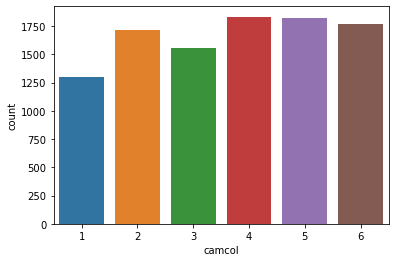

In [12]:
ax=sns.countplot(x='camcol',data=df)
print(df['camcol'].value_counts())

camcol is basically a Camera column ,there is 6 unique values in this column and there is not much difference.

the camera column, or "camcol," a number from 1 to 6, identifying the scanline within the run.

GALAXY    4998
STAR      4152
QSO        850
Name: class, dtype: int64


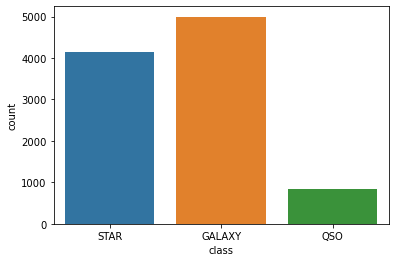

In [15]:
ax=sns.countplot(x='class',data=df)
print(df['class'].value_counts())

Class column is objcect class , There is three Unique values in the column that is GALAXY with 4998 numbers, STAR with 4152 numbers and QSO with 850 numbers.

# Visualization of integer and float data

In [16]:
df.columns

Index(['objid', 'ra', 'dec', 'u', 'g', 'r', 'i', 'z', 'run', 'rerun', 'camcol',
       'field', 'specobjid', 'class', 'redshift', 'plate', 'mjd', 'fiberid'],
      dtype='object')

<AxesSubplot:xlabel='ra', ylabel='Density'>

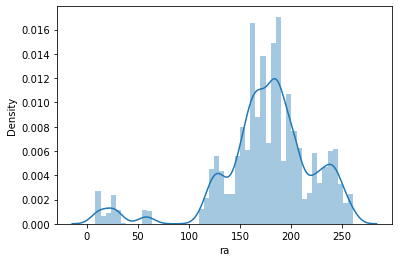

In [18]:
sns.distplot(df['ra'], kde=True)

ra is indiacting 'J2000 Right Ascension (r-band)' and id bit right skewed.

<AxesSubplot:xlabel='dec', ylabel='Density'>

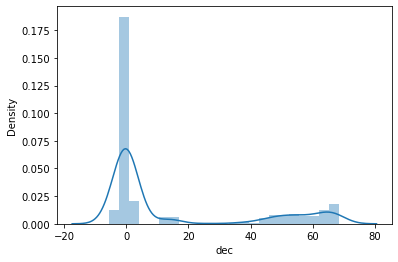

In [19]:
sns.distplot(df['dec'], kde=True)

dec is indicating 'J2000 Declination (r-band)' and it is not looking normally distributed.

<AxesSubplot:xlabel='u', ylabel='Density'>

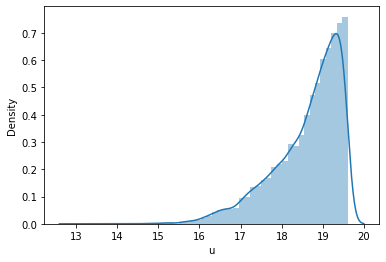

In [20]:
sns.distplot(df['u'], kde=True)

u is indiacting 'better of DeV/Exp magnitude fit' and it is right skewed.

<AxesSubplot:xlabel='g', ylabel='Density'>

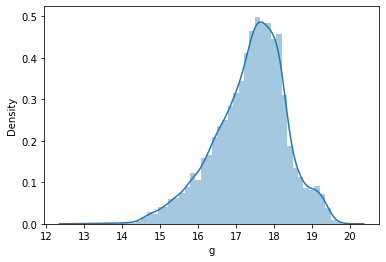

In [21]:
sns.distplot(df['g'], kde=True)

g is indiacting ' better of DeV/Exp magnitude fit' and it is looking bit right skewed.

<AxesSubplot:xlabel='r', ylabel='Density'>

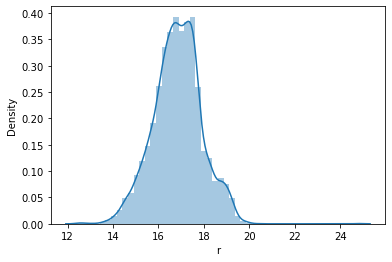

In [22]:
sns.distplot(df['r'], kde=True)

r is indiacting 'better of DeV/Exp magnitude fit' and it is bit left skewed.

<AxesSubplot:xlabel='i', ylabel='Density'>

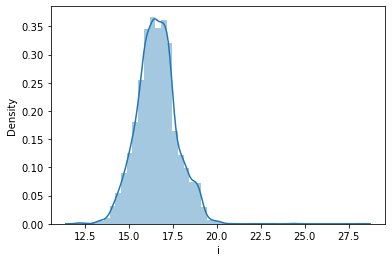

In [23]:
sns.distplot(df['i'], kde=True)

i is indiacting 'better of DeV/Exp magnitude fit' and is bit left skewed.

<AxesSubplot:xlabel='z', ylabel='Density'>

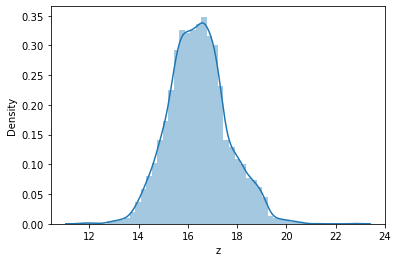

In [24]:
sns.distplot(df['z'], kde=True)

z is indiacting 'better of DeV/Exp magnitude fit' and is looking normal.

<AxesSubplot:xlabel='field', ylabel='Density'>

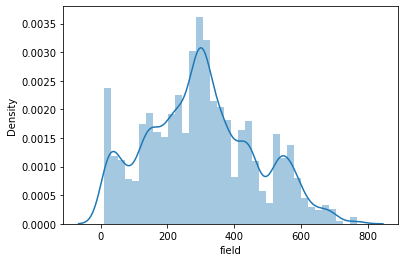

In [27]:
sns.distplot(df['field'], kde=True)

field column is indiacting field number ,  and its ranges in between 11 to 800 and not looking normal.

the field number. The field number typically starts at 11 (after an initial rampup time), and can be as large as 800 for particularly long runs.

<AxesSubplot:xlabel='redshift', ylabel='Density'>

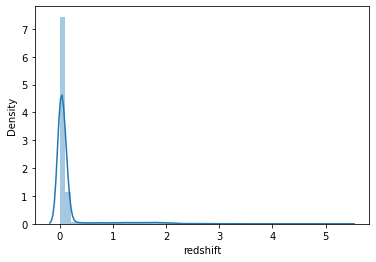

In [28]:
sns.distplot(df['redshift'], kde=True)

redshift is indicating ' Final Redshift' and it is left skewed.

<AxesSubplot:xlabel='plate', ylabel='Density'>

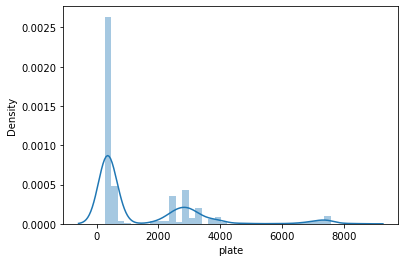

In [29]:
sns.distplot(df['plate'], kde=True)

plate is plate number and it is not looking normal.

<AxesSubplot:xlabel='mjd', ylabel='Density'>

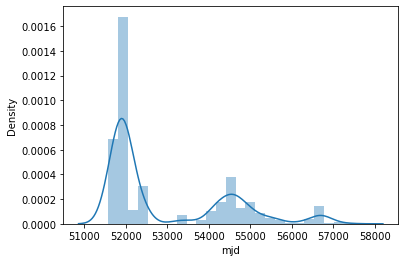

In [30]:
sns.distplot(df['mjd'], kde=True)

mjd is indiacting MJD of observation and its ranges in between 52000 to 53000 , 53000 to 56000 and 56000 to approx 58000

<AxesSubplot:xlabel='fiberid', ylabel='Density'>

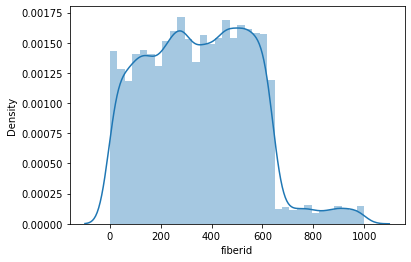

In [31]:
sns.distplot(df['fiberid'], kde=True)

fiberid column is looking normally distributed.

# Checking outliers

objid           AxesSubplot(0.125,0.657941;0.110714x0.222059)
ra           AxesSubplot(0.257857,0.657941;0.110714x0.222059)
dec          AxesSubplot(0.390714,0.657941;0.110714x0.222059)
u            AxesSubplot(0.523571,0.657941;0.110714x0.222059)
g            AxesSubplot(0.656429,0.657941;0.110714x0.222059)
r            AxesSubplot(0.789286,0.657941;0.110714x0.222059)
i               AxesSubplot(0.125,0.391471;0.110714x0.222059)
z            AxesSubplot(0.257857,0.391471;0.110714x0.222059)
run          AxesSubplot(0.390714,0.391471;0.110714x0.222059)
rerun        AxesSubplot(0.523571,0.391471;0.110714x0.222059)
camcol       AxesSubplot(0.656429,0.391471;0.110714x0.222059)
field        AxesSubplot(0.789286,0.391471;0.110714x0.222059)
specobjid          AxesSubplot(0.125,0.125;0.110714x0.222059)
redshift        AxesSubplot(0.257857,0.125;0.110714x0.222059)
plate           AxesSubplot(0.390714,0.125;0.110714x0.222059)
mjd             AxesSubplot(0.523571,0.125;0.110714x0.222059)
fiberid 

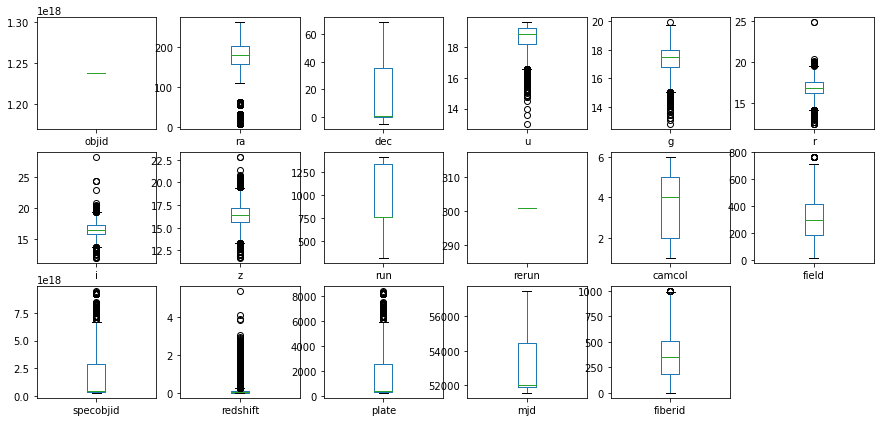

In [39]:
df.plot(kind='box', subplots=True, layout=(3,6), figsize=(15,7))

outliers present in 'u', 'g', 'r', 'i', 'z', 'field', 'specobjid','redshit', 'plate' and 'fiberid.'

# Checking skewness

In [40]:
df.skew()

objid        0.000000
ra          -1.227350
dec          1.191544
u           -1.219795
g           -0.536293
r           -0.021673
i            0.286442
z            0.214313
run          0.412555
rerun        0.000000
camcol      -0.100220
field        0.249795
specobjid    1.794627
redshift     4.265729
plate        1.794609
mjd          1.039610
fiberid      0.308053
dtype: float64

Columns are not looking much skewed except 'redshift'.

# Label coding to class column

In [41]:
df['class'].replace({'GALAXY':0,'STAR':1,'QSO':2},inplace=True)

In [42]:
df.head()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,1.237650e+18,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,301,4,267,3.722360e+18,1,-0.000009,3306,54922,491
1,1.237650e+18,183.598370,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,301,4,267,3.638140e+17,1,-0.000055,323,51615,541
2,1.237650e+18,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,301,4,268,3.232740e+17,0,0.123111,287,52023,513
3,1.237650e+18,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,301,4,269,3.722370e+18,1,-0.000111,3306,54922,510
4,1.237650e+18,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,301,4,269,3.722370e+18,1,0.000590,3306,54922,512


Now we can see class column is enocded.

# Statistical Summary

In [43]:
df.describe()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,1.237650e+18,175.529987,14.836148,18.619355,17.371931,16.840963,16.583579,16.422833,981.034800,301.0,3.648700,302.380100,1.645022e+18,0.585200,0.143726,1460.986400,52943.533300,353.069400
std,1.577039e+05,47.783439,25.212207,0.828656,0.945457,1.067764,1.141805,1.203188,273.305024,0.0,1.666183,162.577763,2.013998e+18,0.642481,0.388774,1788.778371,1511.150651,206.298149
min,1.237650e+18,8.235100,-5.382632,12.988970,12.799550,12.431600,11.947210,11.610410,308.000000,301.0,1.000000,11.000000,2.995780e+17,0.000000,-0.004136,266.000000,51578.000000,1.000000
25%,1.237650e+18,157.370946,-0.539035,18.178035,16.815100,16.173333,15.853705,15.618285,752.000000,301.0,2.000000,184.000000,3.389248e+17,0.000000,0.000081,301.000000,51900.000000,186.750000
50%,1.237650e+18,180.394514,0.404166,18.853095,17.495135,16.858770,16.554985,16.389945,756.000000,301.0,4.000000,299.000000,4.966580e+17,1.000000,0.042591,441.000000,51997.000000,351.000000
75%,1.237650e+18,201.547279,35.649397,19.259232,18.010145,17.512675,17.258550,17.141447,1331.000000,301.0,5.000000,414.000000,2.881300e+18,1.000000,0.092579,2559.000000,54468.000000,510.000000
max,1.237650e+18,260.884382,68.542265,19.599900,19.918970,24.802040,28.179630,22.833060,1412.000000,301.0,6.000000,768.000000,9.468830e+18,2.000000,5.353854,8410.000000,57481.000000,1000.000000


Number of count is same in all the columns except 'objid'.

There is not much difference between mean and median 50% in any column.

Data is deviated in some of the columns.

not much differnce between 75% and max in any column.


# Removing unnecessary column

In [47]:
# All the values is same in rerun column so i am dropping it
del df['rerun']

# Checking correleations

<AxesSubplot:>

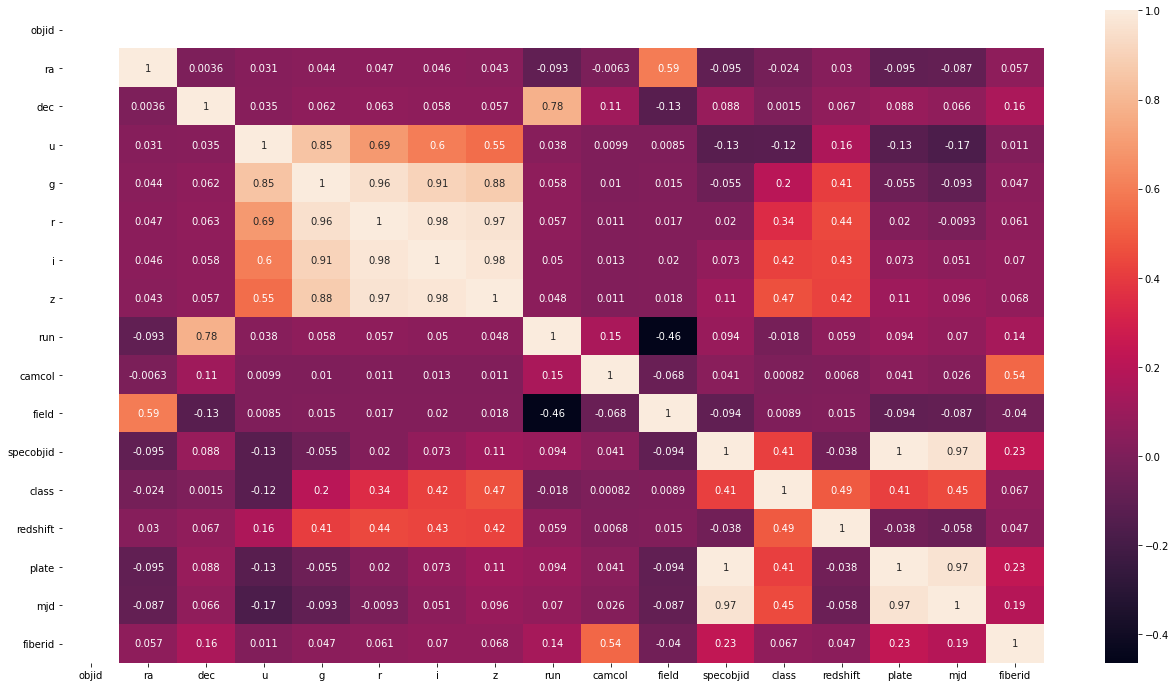

In [48]:
plt.figure(figsize=(22,12))
sns.heatmap(df.corr(), annot=True)

redshift , plate , mjd , g ,r ,i and z columns are positively correlated with class column.

field is negatively correlated with run.

run is positively correlated with dec.

# Removing outliers

In [49]:
from scipy.stats import zscore

In [50]:
z=np.abs(zscore(df))
threshold=3
np.where(z>3)

(array([  45,  109,  129, ..., 9994, 9997, 9997], dtype=int64),
 array([13, 13, 13, ..., 14, 11, 14], dtype=int64))

In [51]:
df_new=df[(z<3).all(axis=1)]
df_new

,objid,ra,dec,u,g,r,i,z,run,camcol,field,specobjid,class,redshift,plate,mjd,fiberid


So we can see we are loosing our whole data in outier removal process , so I will not take df_new variable in further process.

and We will also not removing skewness because of the data loss.

# Seprating the columns into x and y

In [53]:
x=df.drop('class',axis=1)
y=df['class']

In [54]:
x.shape

(10000, 16)

In [55]:
y.shape

(10000,)

# Train Test Split

In [56]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=.30, random_state=43)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(7000, 16)
(3000, 16)
(7000,)
(3000,)


# HANDLING CLASS IMBALANCE PROBLEM BY OVERSAMPLING THE MINORITY CLASS

In [57]:
# In class column GALAXY and STAR are looking normal but QSO has low value count so we will doing oversampling here for overcome this situation
from imblearn.over_sampling import SMOTE
SM=SMOTE()
x_over, y_over=SM.fit_resample(x,y)

In [58]:
y_over.value_counts()

0    4998
1    4998
2    4998
Name: class, dtype: int64

Now unique values are looking same. so we can predict better accuracy.

# Model Building

In [63]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,roc_curve, roc_auc_score

In [60]:
# logistic Regression
lr=LogisticRegression()
lr.fit(x_train,y_train)
pred_y=lr.predict(x_test)
print(accuracy_score(y_test,pred_y))
print(confusion_matrix(y_test,pred_y))
print(classification_report(y_test,pred_y))

0.5
[[1500    0    0]
 [1260    0    0]
 [ 240    0    0]]
              precision    recall  f1-score   support

           0       0.50      1.00      0.67      1500
           1       0.00      0.00      0.00      1260
           2       0.00      0.00      0.00       240

    accuracy                           0.50      3000
   macro avg       0.17      0.33      0.22      3000
weighted avg       0.25      0.50      0.33      3000



In [61]:
# cross Validation logistic regression
score=cross_val_score(lr,x,y,cv=5)
print('cv score',np.mean(score))

cv score 0.4998


accuracy score is 505 and cv score is 49.98%.

In [65]:
# random forest classifier
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
pred_y=rf.predict(x_test)
print(accuracy_score(y_test,pred_y))
print(confusion_matrix(y_test,pred_y))
print(classification_report(y_test,pred_y))

0.987
[[1486   11    3]
 [   0 1260    0]
 [  25    0  215]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1500
           1       0.99      1.00      1.00      1260
           2       0.99      0.90      0.94       240

    accuracy                           0.99      3000
   macro avg       0.99      0.96      0.97      3000
weighted avg       0.99      0.99      0.99      3000



In [66]:
# cross validation Random forest classifier
score=cross_val_score(rf,x,y,cv=5)
print('cv score',np.mean(score))

cv score 0.9883


Accuarcy socre is 98.7% and cv score is 98.83%.

In [68]:
# Decision tree Classifier
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
pred_y=dt.predict(x_test)
print(accuracy_score(y_test,pred_y))
print(confusion_matrix(y_test,pred_y))
print(classification_report(y_test,pred_y))

0.986
[[1489    2    9]
 [   5 1255    0]
 [  26    0  214]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1500
           1       1.00      1.00      1.00      1260
           2       0.96      0.89      0.92       240

    accuracy                           0.99      3000
   macro avg       0.98      0.96      0.97      3000
weighted avg       0.99      0.99      0.99      3000



In [69]:
# cross validatio decision tree classifier
score=cross_val_score(dt,x,y,cv=5)
print('cv score',np.mean(score))

cv score 0.9851000000000001


accuracy score is 98.6 and cross validation score is 98.51%.

In [70]:
# Adaboost classifier
ad=AdaBoostClassifier()
ad.fit(x_train,y_train)
pred_y=ad.predict(x_test)
print(accuracy_score(y_test,pred_y))
print(confusion_matrix(y_test,pred_y))
print(classification_report(y_test,pred_y))

0.777
[[1054    9  437]
 [ 143 1117    0]
 [  80    0  160]]
              precision    recall  f1-score   support

           0       0.83      0.70      0.76      1500
           1       0.99      0.89      0.94      1260
           2       0.27      0.67      0.38       240

    accuracy                           0.78      3000
   macro avg       0.70      0.75      0.69      3000
weighted avg       0.85      0.78      0.80      3000



In [71]:
# cross validaation adaboost classifier
score=cross_val_score(ad,x,y,cv=5)
print('cv score',np.mean(score))

cv score 0.8884000000000001


Accuarcy score is 77.7% and cv score is 88.84%

# Hyper Parameter Tuning

In [74]:
from sklearn import datasets
from sklearn.model_selection import GridSearchCV

rf=RandomForestClassifier(max_depth=6,random_state=0)

grid_param={'criterion':['ginny','entropy']}

gd_sr=GridSearchCV(estimator=rf,
                  param_grid=grid_param,
                  scoring='accuracy',
                  cv=5)

gd_sr.fit(x,y)

best_parameters=gd_sr.best_params_
print(best_parameters)
best_result=gd_sr.best_score_
print(best_result)

{'criterion': 'entropy'}
0.9875


# Final Model

In [76]:
final_model=RandomForestClassifier(criterion='entropy')
final_model.fit(x_train,y_train)
pred_y=final_model.predict(x_test)
acc=accuracy_score(y_test,pred_y)
print(acc*100)

98.73333333333333


So after Hyper Parameter of Rnadom Forest we are getting 98.73% accuracy score , It means Our model is prforming extermely well.

# saving the model

In [82]:
import pickle
filename='space_server.pickle'
pickle.dump(rf,open(filename,'wb'))

# conclusion

In [83]:
loded_model=pickle.load(open('space_server.pickle','rb'))
loded_model.fit(x_train,y_train)
result=loded_model.score(x_test,y_test)
print(result)

0.984


With the help of MODEL , I learnt how to done EDA.

I also learnt ,making use of packages like matplotlib and seaborn to develop better insights of the data.

I have also learnt how to remove outliers and skewness to predict better accuracy.

I have also seen the impacts on the columns on target columns..

I came to know through the analysis ,which model will predict better accuracy.

This project helped me to gain deep knowledge , and also get to know where to use models.